# Course Difficulty, Instructor Rating, and Fields of Study: a COGS 108 group project

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

CAPE at University of Califronia, San Diego is an anonymous online rating sytem for students to provide feedback to the instrutors and their courses. In this data analysis study, we try to look at the correlation between course difficulty and instructor ratings on CAPE, and whether this correlation is significantly different among courses in different fields of study (STEM, Social Science, and Humanities). Against our expectations, our results show that course diffculty does not have a significant correlation with instructor rating, and that even if this correlation exits, STEM courses do not exhibit the highest correlation.

# Names

- Sharon Chen
- Pamela Ghag
- Yuzi Chu
- Cheng Chang
- Stanley Hahm

<a id='research_question'></a>
# Research Question

Are there significant differences among courses under the Humanities, Social Science, and STEM departments at UCSD in terms of correlation between course difficulty and instructors’ ratings given through UCSD's official student-feedback platform, CAPE?

<a id='background'></a>

## Background & Prior Work

Our interest in this question stems from the shared experience of using the university's official student-feedback platform, CAPE, to get a basic understanding of certain classes (e.g. how difficult any one can be) and the teaching style of a professor. CAPE allows students to give feedback and ratings to their education, while also informing the incoming class of students about how rigorous the workload can get for a particular course. Students who observe these metrics can then get a broad overview of how a particular class could impact their educational experience for any relevant quarter at UCSD and decide whether or not to enroll. Given the potency of influence student feedback can have when it comes to how a particular course or instructor is perceived, we agree that it was especially important for us to study exactly which primary variables actually go into predicting whether or not a student is likely to recommend a particular professor, or at least grant him/her a favorable rating. 

This topic has been previously discussed by researchers. In a paper jointly published by Justin Esarey and Natalie Valdes titled "Unbiased, reliable, and valid student evaluations can still be unfair", the researchers used computational simulation "to show that, under ideal circumstances, even careful and judicious use of SETs [student evaluations of teaching] to assess faculty can produce an unacceptably high error rate... __a large difference in SET scores *fails* to reliably identify the best teacher in a pairwise comparison__"(1). The far-reaching implications of such biased outcomes are further highlighted in Colleen Flaherty’s blog on Inside Higher Ed, "Study: Student evaluations of teaching are deeply flawed". She indicates that the danger of such biased evaluations lays in the institution's heightened proclivity to "punish" professors marginalized by arbitrarily unfavorable ratings to teach unpopular courses (2).

Therefore, __understanding what factors impact instructors' ratings, as well as the possible biases present in such determinations, are essential to both educators and students__. With this in mind, we would like to investigate the question at a more micro-level, such that we are not simply looking for a correlation overall between course difficulty and instructors' rating. Rather, we wish to compare the extent to which this correlation is held across different departments. To reiterate our question, we aim to answer: Are there significant differences among courses under the Humanities, Social Science, and STEM departments at UCSD in terms of correlation between course difficulty and teachers’ ratings given through UCSD's official student-feedback platform, CAPE? 

We plan to compare the correlations between course difficulty and teachers' ratings for Humanities, Social Science, and STEM-focused courses. Using CAPE's data, we intend to __define course difficulty as the interaction between the average grade point average (GPA) received in a particular class and the number of hours spent studying for it__. Likewise, we intend to __determine teachers' ratings through the percentage of students who recommend the instructor for future iterations of a particular course__ (i.e. high percentage of recommendations = high rating; lower percentage of recommendations = low rating). 

With these metrics, our goal is to observe whether the correlation between course difficulty and teachers’ ratings holds constant across the Social Sciences, STEM, and Humanities departments, or if it is evaluated to be stronger/weaker for one department over another.

As a first step, we hand-picked some field of studies offered at UCSD and listed them into three categories:

__STEM__: Biology, Chemistry, Computer Science, Data Science, Mathematics, Physics, All Engineering;

__Social Science__: Political Science, Sociology, Psychology, Cognitive Science, Economics; 

__Humanities__: Fine Arts, Literature, Language Studies, Theatre, Film, English, Philosophy, Visual Arts, History

*NOTE: the list of courses representing each department at UCSD here are based on their designations within each department's website*

References:

(1) https://www.tandfonline.com/eprint/IMZDUUHTHCEDD4Q9VZYB/full?target=10.1080%2F02602938.2020.1724875&

(2) https://www.insidehighered.com/news/2020/02/27/study-student-evaluations-teaching-are-deeply-flawed

# Hypothesis


We define the difficulty of a course as (self-reported hours spent on average over the course / average GPA received of the course). We hypothesize that the student rating for instructors have a higher correlation with the difficulty level of the class for courses within the STEM department as opposed to those within the Humanities or Social Science departments.

This hypothesis is a speculation that we make based on our experience that on average, (1) the instructor rating for STEM courses are typically lower than that of Social Science and Humanities, and (2) STEM courses usually have lower average GPA, as well as higher average working hours. Therefore, we posit that the correlation between our defined "difficulty" and the instructor rating would be stronger.

# Dataset

__Dataset Name__: CAPE

__Link to the dataset__: https://raw.githubusercontent.com/dcao/seascape/master/data/data.csv

__Number of observations__: 51281 rows (pre-data cleaning)

__Description__: The CAPE dataset includes information on the professor teaching the course; the course name itself; the quarter in which the course was taken; average GPA received by students; percentage of students that recommend the professor; average GPA expected by students; and the field of study the course is categorized under. The raw dataset includes observations from Fall Quarter 2007 up to and including Spring Quarter 2020.

Each observation has the following columns:

- `instr`: instructor name

- `course`: course name

- `term`: school term

- `enrolled`: number of students enrolled

- `evals`: number of students evaluated

- `recClass`: percentage of students who recommend the class

- __`recInstr`: percentage of students who recommend the instructor__

- __`hours`: estimated hours spent per week to study for the course__

- `gpaExp`: average GPA *expected* by the students 

- __`gpaAvg`: average GPA actually *received* by the students__

We will be using `difficulty`, calcualted from `gpaAvg` and `hours`, as our primary predictor variables in our model with the outcome `recInstr`. We will analyze the magnitude of correlation between course difficulty (indicated through `gpaAvg` and `hours`) and professor rating (indicated through `recInstr`) for each of the Humanities, Social Sciences, and STEM-focused departments. 

As we are measuring course difficulty in terms of average GPA (e.g higher average GPA = lower difficulty, lower average GPA = higher difficulty), we decided to remove any observations that contain a null value in the average GPA column, as they would not contribute to helping us reach a conclusion. We will also be dropping observations from Winter Quarter 2020 and Spring Quarter 2020, as classes during this period were taken during the pandemic, and it would not be an objective indication of the professors capabilities as a teacher due to the extreme and sudden modifications of teaching styles required during these times, as well as the overall challenges experienced by students in their personal lives as a result of the pandemic.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import patsy
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Set font size for graph labels
sns.set(font_scale = 2)

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Read in data
cape = pd.read_csv("https://raw.githubusercontent.com/dcao/seascape/master/data/data.csv")

# Data Cleaning

Since we do not want any data that may be influenced by the COVID-19 pandemic, we want to __drop evaluations made for school term WI20 and SP20__, the lastest 2 terms recorded in the dataset.

In [3]:
cape = cape.drop(cape[(cape.term =='WI20')
                      | (cape.term == 'SP20')
                      | (cape.term == 'FA20')
                      | (cape.term == 'S320')
                      | (cape.term == 'S220')
                      | (cape.term == 'S120')].index)
print(cape.shape)
cape.head()

(46600, 10)


,instr,course,term,enrolled,evals,recClass,recInstr,hours,gpaExp,gpaAvg
4681,"Hill, Seth J",AIP 197DC,FA19,24,3,0.0,0.0,4.50,NaN,NaN
4682,"Wienhausen, Gabriele",AIP 197T,FA19,11,4,100.0,100.0,2.00,NaN,NaN
4683,"Shtienberg, Gilad",ANAR 116,FA19,24,13,100.0,100.0,3.59,3.70,3.35
4684,"Jones, Ian William Nasser",ANAR 121,FA19,14,5,100.0,100.0,1.70,3.60,NaN
4685,"Hanson, Kari Lynne",ANBI 112,FA19,9,7,100.0,100.0,3.93,3.86,NaN


In [4]:
cape["term"].unique()

array(['FA19', 'S319', 'S219', 'S119', 'SP19', 'WI19', 'FA18', 'S318',
       'S218', 'S118', 'SP18', 'WI18', 'FA17', 'S317', 'S217', 'S117',
       'SP17', 'WI17', 'FA16', 'S316', 'S216', 'S116', 'SP16', 'WI16',
       'FA15', 'S315', 'S215', 'S115', 'SP15', 'WI15', 'FA14', 'S314',
       'S214', 'S114', 'SP14', 'WI14', 'FA13', 'S313', 'S213', 'S113',
       'SP13', 'WI13', 'FA12', 'S312', 'S212', 'S112', 'SP12', 'WI12',
       'FA11', 'S311', 'S211', 'S111', 'SP11', 'WI11', 'FA10', 'SU10',
       'SP10', 'WI10', 'FA09', 'SU09', 'SP09', 'WI09', 'FA08', 'SU08',
       'SP08', 'WI08', 'FA07', 'SU07'], dtype=object)

In [5]:
cape.dtypes

instr        object
course       object
term         object
enrolled      int64
evals         int64
recClass    float64
recInstr    float64
hours       float64
gpaExp      float64
gpaAvg      float64
dtype: object

__Data types__ seems to be what we want.

An important method for us to estimate the difficulty of the courses is the average GPA received by the students; therefore, data with no "gpaAvg" does not seem helpful for our purposes. We want to __drop all rows with NaN in the column of average GPA__.

In [6]:
cape = cape.dropna(subset=['gpaAvg'])

Next, we __change column names__ so they are more similar and "pythonic".

In [7]:
col_name_map = {
    "evals": "eval",
    "recClass": "rec_class",
    "recInstr": "rec_instr",
    "gpaExp": "gpa_exp",
    "gpaAvg": "gpa_rec"
}
cape = cape.rename(columns=col_name_map)
print(list(cape.columns))

['instr', 'course', 'term', 'enrolled', 'eval', 'rec_class', 'rec_instr', 'hours', 'gpa_exp', 'gpa_rec']


As stated above, due to privacy concern, we would like to hide the name of the instructor and the course. Here we will first __map insturctor names to an ID and delete their names from the DataFrame__.

In [8]:
# Change all instructor names to lower cases
cape["instr"] = cape["instr"].apply(lambda name: name.lower())

# Make a list of unique instructor name and IDs
instr_names = cape["instr"].unique()
instr_names.sort()
instr_ids = [("I_" + str(x)) for x in range(len(instr_names))]

# Make a map of names and IDs
instr_id_map = {n:i for (n,i) in zip(instr_names, instr_ids)}

# Switch instructor names to IDs
cape["instr"] = cape["instr"].apply(lambda name: instr_id_map[name])

# Reset DataFrame index
cape = cape.reset_index(drop=True)

We need to change course names to IDs as we need to __classify the disciplines (Humanities, Social Science, STEM) they belongs to__, and __hide class names for privacy__.

In [9]:
# takes out number in class course name so only class department
def class_department(str_in):
    # takes out number
    class_dep = re.sub(r'\d+', '', str_in)
    
    # takes out any extra letter. I.e. 'CHEM A' --> 'CHEM'
    class_dep_split = class_dep.split()
    class_dep = class_dep_split[0]
    return class_dep

# use class_department to change all courses to fit only department
cape['course'] = cape['course'].apply(class_department)

__Separate these majors into `stem`, `social_sci`, and `hum` fields.__

Note and disclaimer: When classifying courses, we try our best to rely upon their respective majors and departments; however, some outliers are hand-picked. We understand that this decision may cause biases in our result. Notably:
- 'ERC' and 'TMC' are discarded as college seminars.
- 'ESYS' and 'ENVR' are classified as social science, as they touch heavily on environmental policy and soical decisions.
- All college writing courses are classified as humanities.

In [10]:
#SOME OF THESE MAJORS HAVE DIFFERENT DEPARTMENT NAMES BUT SAME MAJOR
#For example: Anthroplogy = 'ANAR', 'ANBI', 'ANSC', 'ANTH'

#list of STEM majors
stem = ['BENG', 'BIBC', 'BICD', 'BIEB', 'BILD', 'BIMM', 'BIPN', 
        'BISP', 'CENG', 'CHEM', 'CHIN', 'CSE', 'DSC', 'ECE', 
        'FMPH', 'GLBH', 'HDS', 'MAE', 'MATH', 'NANO', 'PHYS',
        'SE', 'SIO', 'FPMU']

#list of social science majors
social_sci = ['ANAR', 'ANBI', 'ANSC', 'ANTH', 'CGS', 'COGS', 
              'CSS', 'DSGN', 'ECON', 'EDS', 'ENVR', 'ETHN',
              'ESYS', 'HIAF', 'HIEA', 'HIEU','HILA', 'HILD',
              'HINE', 'HISC', 'HITO', 'HIUS', 'INTL', 'MGT',
              'POLI', 'PSYC', 'SOCI', 'TWS', 'USP', 'CCS',
              'HDP', 'LAWS', 'HMNR', 'COGN', 'SOCE', 'STPA',
              'SOCA', 'SOCB', 'SOCC', 'SOCD','SOCL']

#list of humanities majors
hum = ['AAS', 'AWP', 'CAT', 'COMM', 'DOC', 'ENG', 'HUM', 'JAPN', 
       'LATI', 'LIGN', 'LTAM', 'LTCH', 'LTCS', 'LTEA', 'LTEN', 
       'LTEU', 'LTFR', 'LTGM', 'LTLA', 'LTRU', 'LTSP', 'LTTH', 
       'LTWL', 'LTWR', 'MMW', 'MUS', 'PHIL', 'RELI', 'TDAC', 'TDDE',
       'TDDM', 'TDDR', 'TDGE', 'TDHT', 'TDMV', 'TDPR', 'TDTR', 'VIS',
       'WCWP', 'LIHL', 'LTGK', 'LTIT', 'LTKO', 'TDPW', 'TDPF',
       'ELWR', 'ICAM', 'TDHD', 'JUDA', 'COCU', 'COHI', 'COMT', 'COSF', 
       'TDCH', 'LTAF']

We then make a new column for __determining the field of study__ of each course.

In [11]:
def set_field(course):
    if course in stem:
        return "stem"
    elif course in social_sci:
        return "social_sci"
    elif course in hum:
        return "hum"
    return np.nan

cape["field"] = cape["course"].apply(set_field)

In [12]:
# Drop all courses outside the range of all field of studies that we are looking at
cape.dropna(subset=["field"], inplace=True)

print(cape.shape)
cape.head()

(32711, 11)


,instr,course,term,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,field
0,I_3115,ANAR,FA19,24,13,100.0,100.0,3.59,3.70,3.35,social_sci
1,I_2474,ANBI,FA19,54,46,91.0,97.0,4.50,3.72,3.55,social_sci
2,I_1096,ANBI,FA19,136,63,98.0,98.0,4.40,3.56,2.77,social_sci
3,I_1500,ANBI,FA19,20,13,92.0,100.0,6.81,3.42,3.36,social_sci
4,I_2514,ANSC,FA19,34,15,100.0,100.0,3.36,3.57,3.68,social_sci


# Data Analysis & Results

## Exploratory Data Analysis (EDA)

We first want to take a look at the general trend of our data.

In [13]:
print("Number of different instructors:", len(cape["instr"].unique()))
print("Number of different course IDs:", len(cape["course"].unique()))

print("Number of STEM observations: " + str(len(cape[cape["field"] == "stem"]))
      + "; instructors: " + str(len(cape[cape["field"] == "stem"]["instr"].unique())))

print("Number of Social Science observations: ", str(len(cape[cape["field"] == "social_sci"]))
      + "; instructors: " + str(len(cape[cape["field"] == "social_sci"]["instr"].unique())))

print("Number of Humanities observations: ", str(len(cape[cape["field"] == "hum"]))
      + "; instructors: " + str(len(cape[cape["field"] == "hum"]["instr"].unique())))

Number of different instructors: 3843
Number of different course IDs: 119
Number of STEM observations: 13553; instructors: 1596
Number of Social Science observations:  10537; instructors: 1452
Number of Humanities observations:  8621; instructors: 1062


We see here that __the number of courses offered at UCSD and the number of instructors differs among fields__. This may create a potential weak spot of our analysis.

In [14]:
cape.describe()

,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec
count,32711.00,32711.00,32711.00,32711.00,32711.00,32369.00,32711.00
mean,100.59,51.33,87.21,87.04,5.77,3.46,3.22
std,91.73,51.41,12.23,14.92,2.34,0.29,0.40
min,20.00,3.00,0.00,0.00,0.50,1.60,1.21
25%,34.00,17.00,81.00,81.00,4.21,3.27,2.93
50%,64.00,32.00,90.00,92.00,5.36,3.45,3.21
75%,139.00,68.00,96.00,98.00,6.90,3.67,3.51
max,1064.00,509.00,100.00,100.00,20.33,4.00,4.00


We see that some courses have very few evaluations. __Check what those are and drop them__.

In [15]:
print("Dropped courses with less than 5 evaluations:", len(cape[cape["eval"] < 5]))
cape = cape[cape["eval"] >= 5]

Dropped courses with less than 5 evaluations: 299


If the ratios between evaluation and enrolled are too small, we may not receive an accurate reflection of the overall student feedback. We want to look at the relation between these two values.

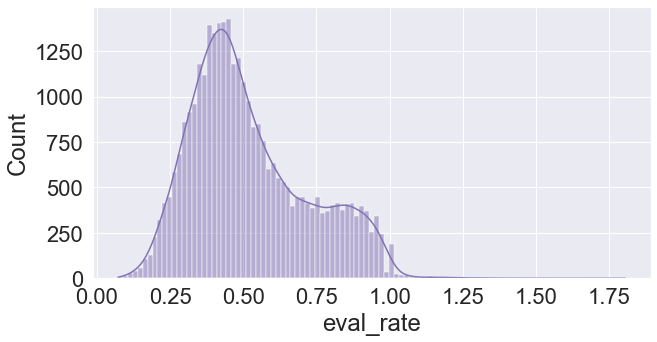

In [16]:
cape["eval_rate"] = cape["eval"] / cape["enrolled"]
plot_eval_rate = sns.histplot(cape["eval_rate"], kde=True, color="m")

We see that dropping some courses with low rating rates does not diminish our dataset significantly.

In [17]:
print("Dropped courses with less than 20% evaluation rates:", len(cape[cape["eval_rate"] < 0.2]))
cape = cape[cape["eval_rate"] >= 0.2]

Dropped courses with less than 20% evaluation rates: 480


In [18]:
print(cape.shape)
cape.head()

(31932, 12)


,instr,course,term,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,field,eval_rate
0,I_3115,ANAR,FA19,24,13,100.0,100.0,3.59,3.70,3.35,social_sci,0.54
1,I_2474,ANBI,FA19,54,46,91.0,97.0,4.50,3.72,3.55,social_sci,0.85
2,I_1096,ANBI,FA19,136,63,98.0,98.0,4.40,3.56,2.77,social_sci,0.46
3,I_1500,ANBI,FA19,20,13,92.0,100.0,6.81,3.42,3.36,social_sci,0.65
4,I_2514,ANSC,FA19,34,15,100.0,100.0,3.36,3.57,3.68,social_sci,0.44


In [19]:
cape.describe()

,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,eval_rate
count,31932.00,31932.00,31932.00,31932.00,31932.00,31605.00,31932.00,31932.00
mean,101.69,52.36,87.19,87.06,5.75,3.46,3.22,0.53
std,92.24,51.58,12.11,14.80,2.32,0.28,0.40,0.20
min,20.00,5.00,0.00,0.00,0.50,1.60,1.21,0.20
25%,34.00,17.00,81.00,81.00,4.20,3.27,2.93,0.38
50%,65.00,33.00,90.00,92.00,5.36,3.45,3.21,0.48
75%,141.00,70.00,96.00,98.00,6.86,3.66,3.50,0.65
max,1064.00,509.00,100.00,100.00,20.33,4.00,4.00,1.81


We currently have a `cape` dataset that also tells us what field of study these courses belongs to. We want to __separate them into 3 dataset__ and inspect them individually.

In [20]:
cape_stem = cape[cape['field'] == "stem"]
cape_social_sci = cape[cape['field'] == "social_sci"]
cape_hum = cape[cape['field'] == "hum"]

In [21]:
#Check the average studying hours, average gpa_rec, and teacher ratings for each category of classes
stem_avgGPA = cape_stem['gpa_rec'].mean()
social_sci_avgGPA = cape_social_sci['gpa_rec'].mean()
hum_avgGPA = cape_hum['gpa_rec'].mean()

print("stem_avgGPA: " + str(stem_avgGPA))
print("social_sci_avgGPA: " + str(social_sci_avgGPA))
print("hum_avgGPA: " + str(hum_avgGPA))

print()
stem_hours = cape_stem['hours'].mean()
social_sci_hours = cape_social_sci['hours'].mean()
hum_hours = cape_hum['hours'].mean()

print("stem_hours: " + str(stem_hours))
print("social_sci_hours: " + str(social_sci_hours))
print("hum_hours: " + str(hum_hours))

print()
stem_rec_instr = cape_stem['rec_instr'].mean()
social_sci_rec_instr = cape_social_sci['rec_instr'].mean()
hum_rec_instr = cape_hum['rec_instr'].mean()

print("stem_rec_instr: " + str(stem_rec_instr))
print("social_sci_rec_instr: " + str(social_sci_rec_instr))
print("hum_rec_instr: " + str(hum_rec_instr))

stem_avgGPA: 3.0782458125848624
social_sci_avgGPA: 3.2293341144307903
hum_avgGPA: 3.414771218586999

stem_hours: 6.982279311905822
social_sci_hours: 5.017693809802768
hum_hours: 4.6929362256993885

stem_rec_instr: 83.97940244454504
social_sci_rec_instr: 88.73130247998438
hum_rec_instr: 89.85384068278805


As we expected, __Humanities courses have the highest average GPA, lowest average study hours, and the highest average instructor rating__, whereas the __STEM courses have the lowest average GPA, highest study hours, and the lowest average instructor rating__. Social Science stays in the middle for all metrics. The overall trend of GPA, hours, and instructor recommendation follows our intuition.

We then take a closer look at the __signficance and distribution__ of these results.

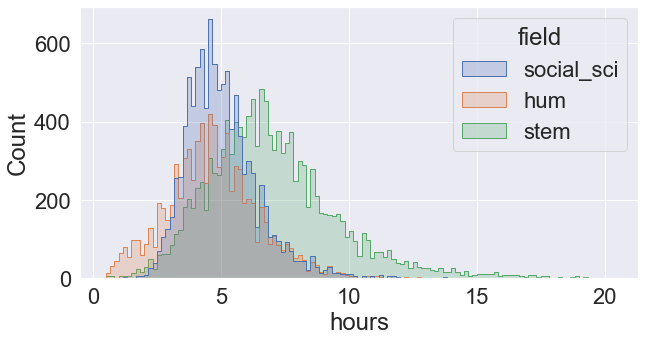

In [22]:
# generate comparative histograms of the three categories of courses in regard of studying hours
plot_hours = sns.histplot(cape, x="hours", hue="field", element="step")

In [23]:
print(stats.ttest_ind(cape_stem["hours"], cape_social_sci["hours"]))
print(stats.ttest_ind(cape_stem["hours"], cape_hum["hours"]))
print(stats.ttest_ind(cape_social_sci["hours"], cape_hum["hours"]))

Ttest_indResult(statistic=69.18535095209559, pvalue=0.0)
Ttest_indResult(statistic=70.92062672717269, pvalue=0.0)
Ttest_indResult(statistic=13.644214896776289, pvalue=3.48225382845319e-42)


The graph above shows the hours students say they spent on their classes, which seems to be all normally distributed. The hours spent in the STEM field (in green) spans from 2 hours all the way to 18 hours. However, students taking humanities and social science classes didn’t spend as much time as STEM students did. The majority of students who took social science classes indicated that they had spent between 4 to 7 hours. Similarly the majority of students who took humanities classes indicated the same. One interesting finding is that the kurtosis of `social_sci` seems to be higher than the other two fields.

T test indcates that the differences of the means are significant.

In [24]:
# A helper method for moving plot legends
# Thanks to Michael Waskom (https://github.com/mwaskom/seaborn/issues/2280)
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

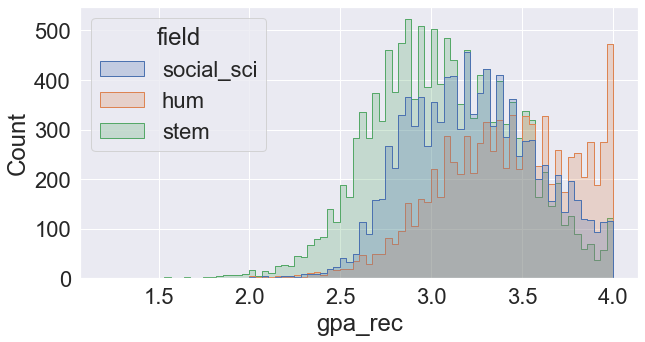

In [25]:
# generate comparative histograms of the three categories of courses in regard of GPA received
plot_gpa_rec = sns.histplot(cape, x="gpa_rec", hue="field", element="step")
move_legend(plot_gpa_rec, "upper left")

In [26]:
print(stats.ttest_ind(cape_stem["gpa_rec"], cape_social_sci["gpa_rec"]))
print(stats.ttest_ind(cape_stem["gpa_rec"], cape_hum["gpa_rec"]))
print(stats.ttest_ind(cape_social_sci["hours"], cape_hum["gpa_rec"]))

Ttest_indResult(statistic=-30.949981188001065, pvalue=3.4869170076093655e-206)
Ttest_indResult(statistic=-63.430804019513936, pvalue=0.0)
Ttest_indResult(statistic=100.19339712775894, pvalue=0.0)


The histogram above shows the gpa received by students in each field of courses, which are roughly normally distributed (Humanities courses seems to be an exception). The gpa received is a variable we are using to indicate the course difficulty. Therefore by the results shown above more students received lower grades in STEM classes in comparison to social science and humanities, so STEM classes are (by our definition) more difficult.

Again, T test seems to indicate that the differences are significant.

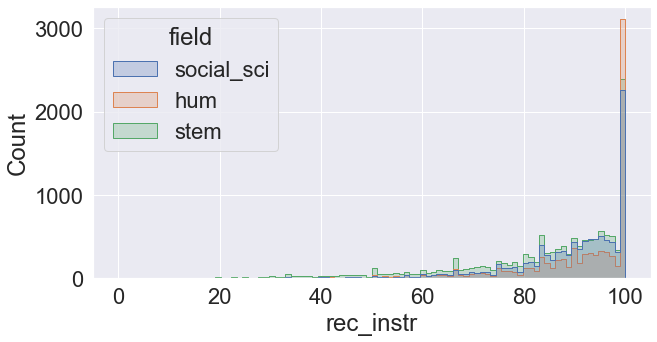

In [27]:
# generate comparative histograms of the three categories of courses in regard of teaching ratings
plot_rec_instr = sns.histplot(cape, x="rec_instr", hue="field", element="step")
move_legend(plot_rec_instr, "upper left")

In [28]:
print(stats.ttest_ind(cape_stem["rec_instr"], cape_social_sci["rec_instr"]))
print(stats.ttest_ind(cape_stem["rec_instr"], cape_hum["rec_instr"]))
print(stats.ttest_ind(cape_social_sci["rec_instr"], cape_hum["rec_instr"]))

Ttest_indResult(statistic=-24.112700283543095, pvalue=6.411327973431978e-127)
Ttest_indResult(statistic=-27.022779611264053, pvalue=3.3133062071705925e-158)
Ttest_indResult(statistic=-6.036924600828769, pvalue=1.6004731709759658e-09)


The `rec_instr` plot shows a curious shape. The number of overwhelmingly positive recommendations are extremely high, which gives all three plots a heavily left skewed shape. This is especially the case with Humanities courses. This may potentially undermine our assumptions.

T test again shows significance.

## Correlations of interests

We then look that the __scatter matrices__ of the three fields.

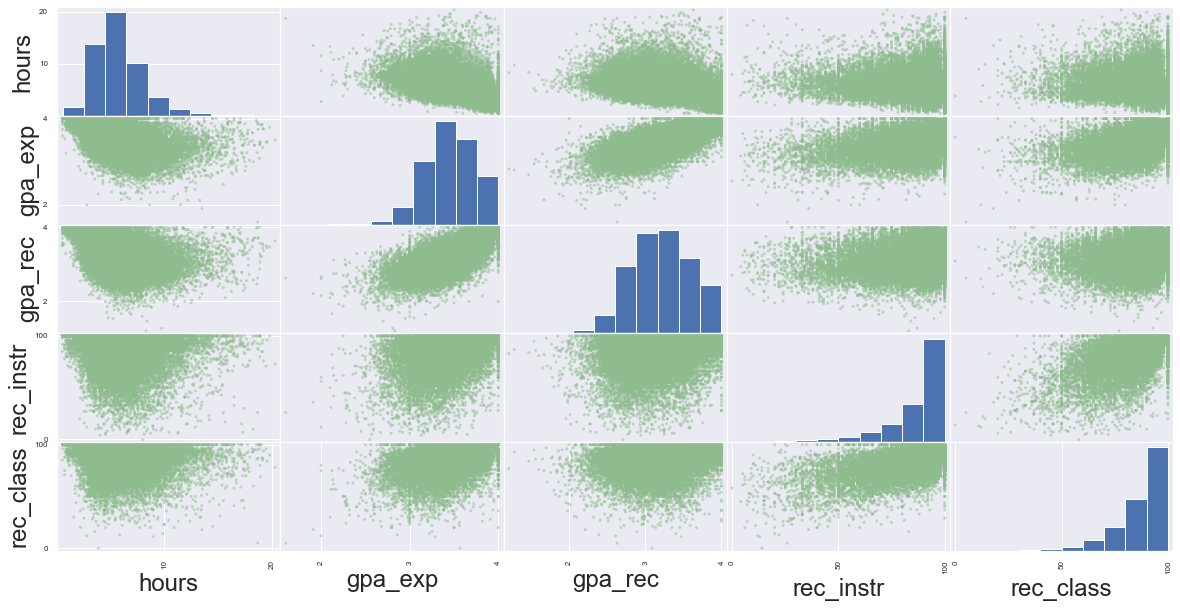

In [29]:
# generate a scatter matrix of stem professors
fig1 = pd.plotting.scatter_matrix(cape[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']], c='darkseagreen',
                                  figsize=(20, 10))

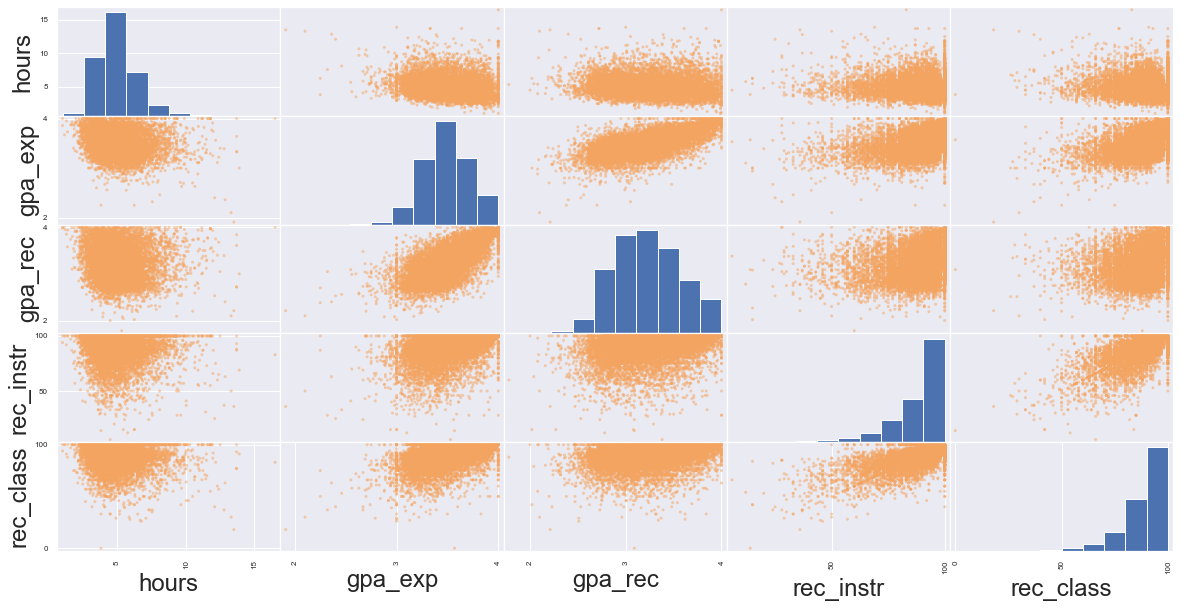

In [30]:
# generate a scatter matrix of social science professors
fig2 = pd.plotting.scatter_matrix(cape_social_sci[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']],
                                  c='sandybrown', figsize=(20, 10))

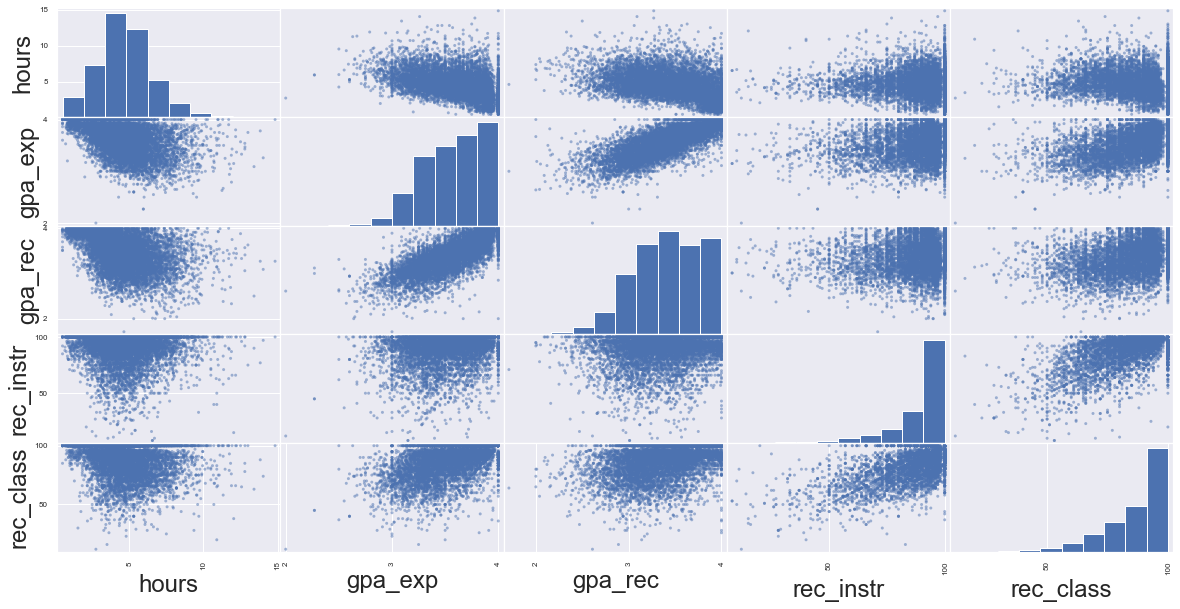

In [31]:
# generate a scatter matrix of humanities professors
fig3 = pd.plotting.scatter_matrix(cape_hum[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']], figsize=(20, 10))

Some findings of the scatter matrices:

- Conforming our previous findings, we see that the histogram for gpa_rec - a variable that is pertinent to our research question through its representation of course difficulty - follows an approximately normal distribution, except for Humanities courses. This indicates that the majority of data points are relatively similar, in that they occur within a small range of values, with few outliers on the high and low ends (i.e. there were neither abnormally high average GPAs nor abnormally low ones).

- On the other hand, the histogram for rec_instr - a variable representing students' perceptions of professors -  is heavily skewed left, possibly indicating that students were more likely to give higher teacher recommendations as opposed to lower. This is especially the case for Humanities.

- The scatterplot depicting the relationship between gpa_rec (on the x-axis) and rec_instr (on the y-axis) is especially of interests. Here, a larger density of points can be found situated in the topmost (higher) side of the plot, indicating typically higher recommendation values for a range of class GPAs.

- Unsurprisingly, the correlation between `rec_instr` and `rec_class` seems to be high, and the correlation between `gpa_exp` (self-reported expected GPA of students) and `gpa_rec`.

- There seems to be a negative correlation between `hours` and `gpa_rec`. This may support our defintion of `difficulty` in that the more difficult a course is, the lower average GPA and the higher average hours spent studying.

- Most importantly, the correlation between `hours` and `rec_instr` is unclear. A vaguely upward trend can be seen.

- Similarly, the correlation between `gpa_rec` and `rec_instr` seems to be unclear, with a vaguely downward trend.

Before we set up the correlation analysis between our defined `difficulty`, we want to first see the correlation between `gpa_rec` and `rec_instr` to get and idea of the performance of `gpa_rec` as the sole predictor.

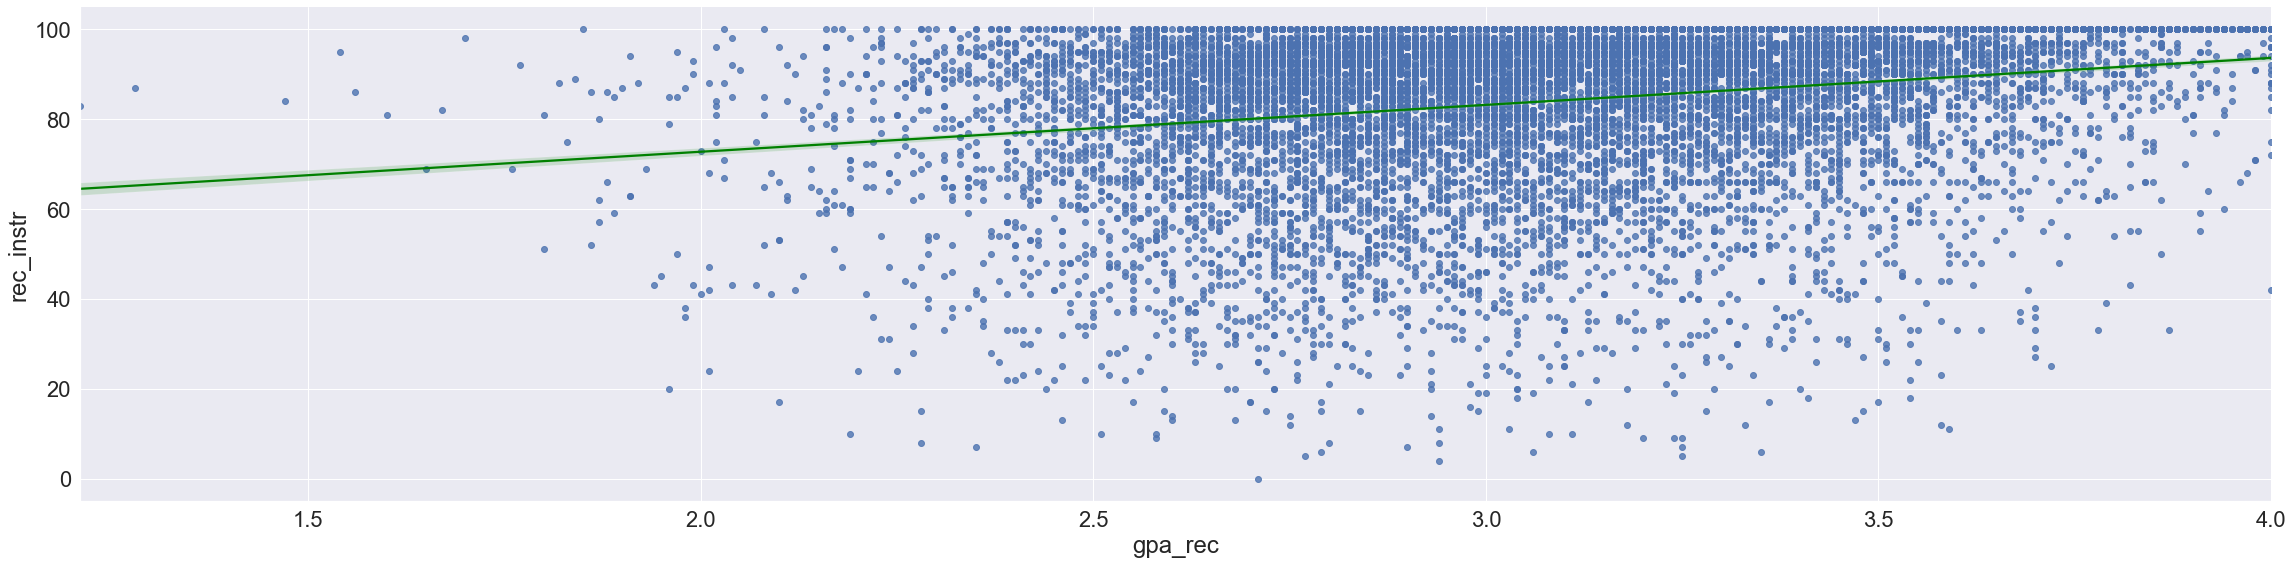

In [32]:
# Check the correlation between gpa_rec and rec_instr for STEM classes
plot1 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_stem, line_kws={'color': 'green'},
                   fit_reg=True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in STEM classes up against the percentage of those students who recommended that specific instructor who taught the STEM class. The figure shows a wide range when it comes to how many students recommended the instructor. The majority of instructors received over 20% recommendation rating. Also, the majority of the students received at least a 2.0 gpa or above.


In [33]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_stem
outcome1, predictor1 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_stem)
model1 = sm.OLS(outcome1, predictor1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     800.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          4.23e-171
Time:                        23:56:00   Log-Likelihood:                -55888.
No. Observations:               13254   AIC:                         1.118e+05
Df Residuals:                   13252   BIC:                         1.118e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8712      1.144     45.359      0.0

Looking at our OLS regression results for STEM classes we can see our best guess of what the intercept (our y intercept, beta 0) between our gpa received and instructor recommendation would be 52, and the standard error is 1.095. If we look at our gpa received coefficient (beta 1, slope of the line) it suggests that as the gpa received increases the recommendation value for the instructor increases by 10.4.

Also, if you look at the standard error around the coefficient it is at 0.351, which means the error is moderate.

Finally, r-square value (6.1%) and the corresponding Pearson's r (0.25) suggests that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

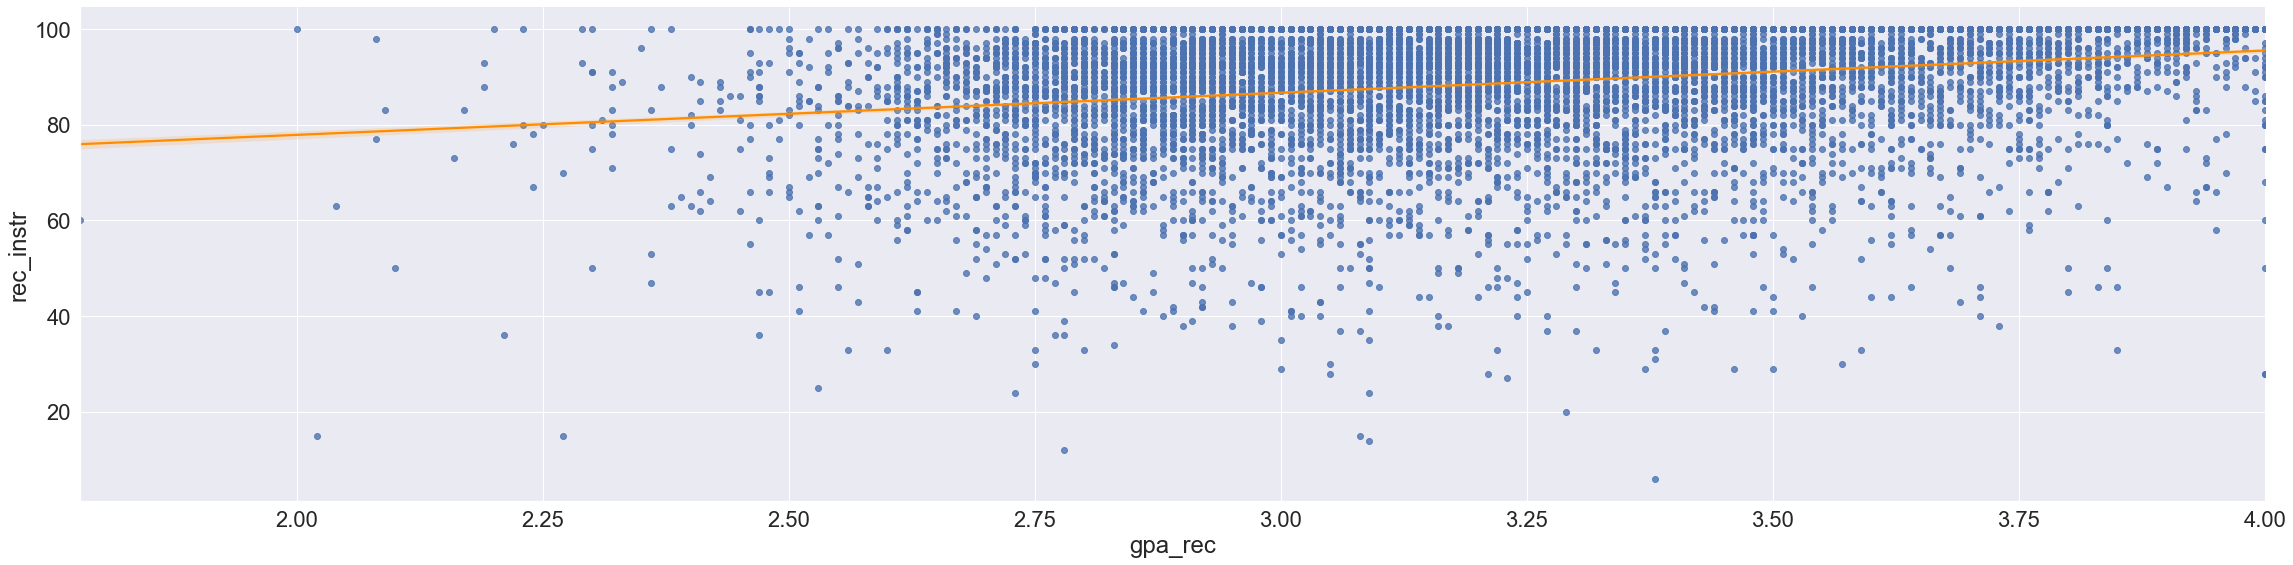

In [34]:
# Check the correlation between gpa_rec and rec_instr for social science classes
plot2 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_social_sci, line_kws={'color': 'darkorange'},
                   fit_reg=True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in social science classes up against the percentage of those students who recommended that specific instructor who taught the social science class. It shows that the majority of instructors received approximately 60% or above recommendation value. Therefore, over half the students who took their class would recommend them to other students.

Also, the majority of the students received on average at least a 2.5 gpa or above. If we compare these numbers to the STEM figure that shows that instructors received over 20% recommendation rate, this highlights social sciences have a higher recommendation rate but similar gpa received by the students.

In [35]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_social_sci
outcome2, predictor2 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_social_sci)
model2 = sm.OLS(outcome2, predictor2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     716.6
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          1.19e-152
Time:                        23:56:00   Log-Likelihood:                -39681.
No. Observations:               10242   AIC:                         7.937e+04
Df Residuals:                   10240   BIC:                         7.938e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.2727      1.069     56.367      0.0

Above is our OLS regression result for social science courses and instructors. If we compare these to the STEM regression results mentioned previously, we can see a slight increase for the (y) intercept, indicating a flater line.

If we look at our gpa received coefficient (beta 1, slope of the line) it suggests that as the gpa received increases the recommendation value for the instructor increases by 8.8. This figure is slightly smaller than the STEM figure of 10.4.

Again, the r-square value (7.0%) and the corresponding Pearson's r (0.26) suggests that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

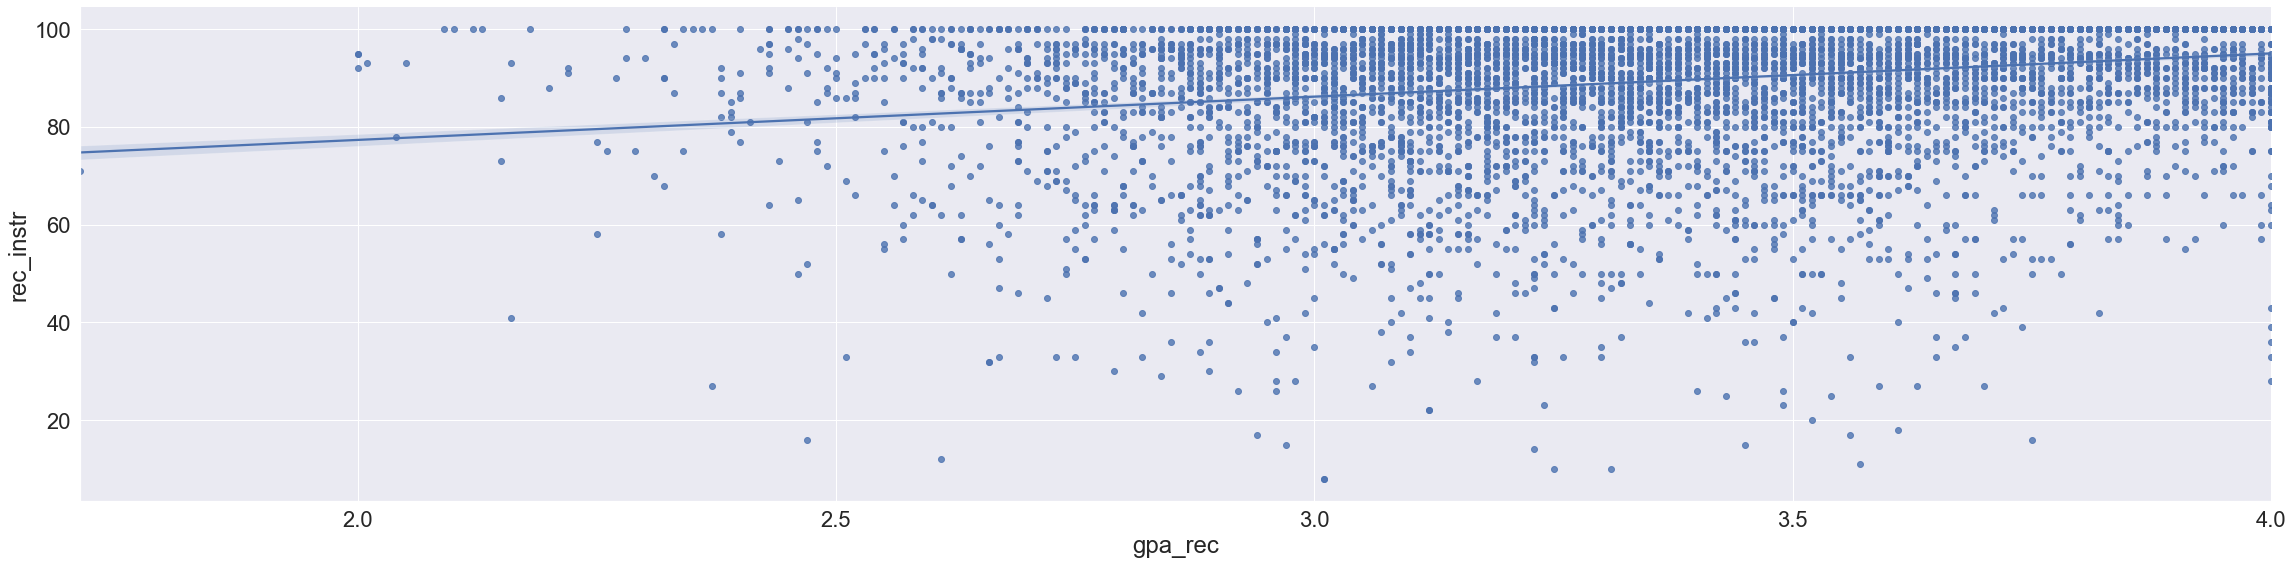

In [36]:
# Check the correlation between gpa_rec and rec_instr for humanities classes
plot3 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_hum, fit_reg = True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in humanity classes up against the percentage of those students who recommended that specific instructor who taught the humanity class. This figure shows that the majority of instructors received approximately 55% or above recommendation value. The majority of the students who took these classes received on average a 2.5 or above. Therefore, in comparison to social science classes, recommendation of instructors and gpa received is very similar. This can be seen in these figures as the patterns are almost identical. However, compared to STEM, humanities instructors have a higher recommendation rate. 

In [37]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_hum
outcome3, predictor3 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_hum)
model3 = sm.OLS(outcome3, predictor3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     546.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          4.11e-117
Time:                        23:56:01   Log-Likelihood:                -33556.
No. Observations:                8436   AIC:                         6.712e+04
Df Residuals:                    8434   BIC:                         6.713e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6394      1.300     45.862      0.0

The OLS regression results for humanity classes shows our best guess y intercept is at 57.3633 for our variables: gpa received and instructor recommendation. It shows the gapa received coefficient is 8.8, nearly identical to social sciences classes.

Again, the r-square value (6.1%) and the corresponding Pearson's r (0.25) suggests that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

### Final Analysis & Results

Now we will create the `difficulty` variable and look at its correlation with `rec_instr`.

To reiterate, `difficulty` = `hours` / `gpa_rec` in our definition.

In [38]:
# Make difficulty
cape["difficulty"] = cape["hours"] / cape["gpa_rec"]
cape_stem['difficulty'] =  cape_stem['hours'] / cape_stem['gpa_rec']
cape_social_sci['difficulty'] =  cape_social_sci['hours'] / cape_social_sci['gpa_rec']
cape_hum['difficulty'] =  cape_hum['hours'] / cape_hum['gpa_rec']

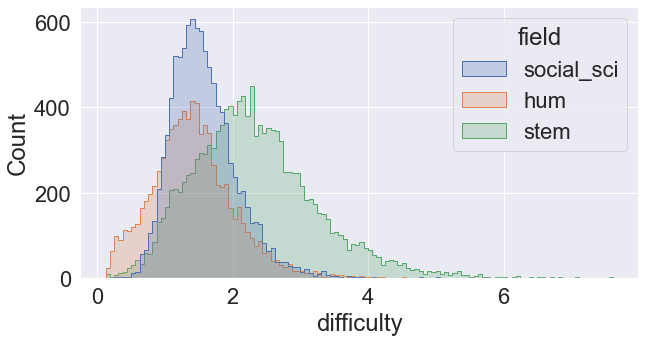

In [39]:
# check its distribution
plot_difficulty = sns.histplot(cape, x="difficulty", hue="field", element="step")

In [40]:
# look at mean difficulty for each field
stem_difficulty = cape_stem['difficulty'].mean()
social_sci_difficulty = cape_social_sci['difficulty'].mean()
hum_difficulty = cape_hum['difficulty'].mean()

print("stem_difficulty: " + str(stem_difficulty))
print("social_difficulty: " + str(social_sci_difficulty))
print("hum_difficulty: " + str(hum_difficulty))

stem_difficulty: 2.323976802968103
social_difficulty: 1.577490197604566
hum_difficulty: 1.413809623898084


In [41]:
# T test them
print(stats.ttest_ind(cape_stem["difficulty"], cape_social_sci["difficulty"]))
print(stats.ttest_ind(cape_stem["difficulty"], cape_hum["difficulty"]))
print(stats.ttest_ind(cape_social_sci["difficulty"], cape_hum["difficulty"]))

Ttest_indResult(statistic=73.49636640175562, pvalue=0.0)
Ttest_indResult(statistic=79.41295752417956, pvalue=0.0)
Ttest_indResult(statistic=20.079498943966428, pvalue=9.62986123751478e-89)


The result seems to show that our new difficulty variable is generally normally distributed. Notably, we see a higher kurtosis for social science courses similar to the `hours` graph. We also see that STEM distributions have a relatively longer tail to the right than the other two graphs, and Humanities is still lower in terms of difficulties. T test suggests a significant differences.

The last step. We try to find __the correlation between `difficulty` and `rec_instr` for the three fields__.

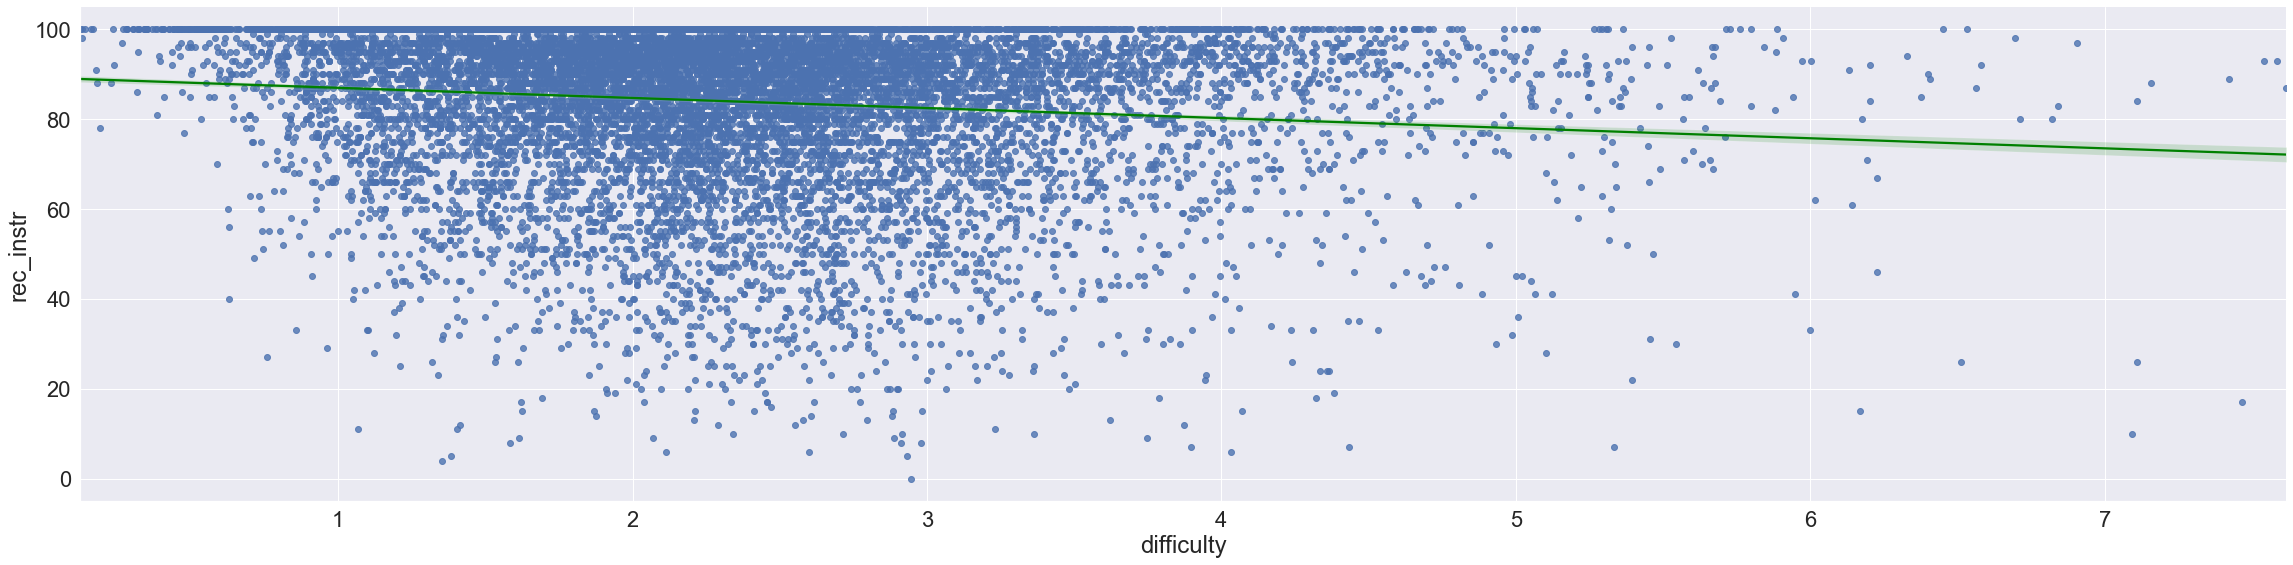

In [42]:
#find correlation between difficulty & rec_instr for stem
plot4 = sns.lmplot(x='difficulty', y='rec_instr', data=cape_stem, line_kws={'color': 'green'},
                   fit_reg=True, height = 8, aspect = 4)

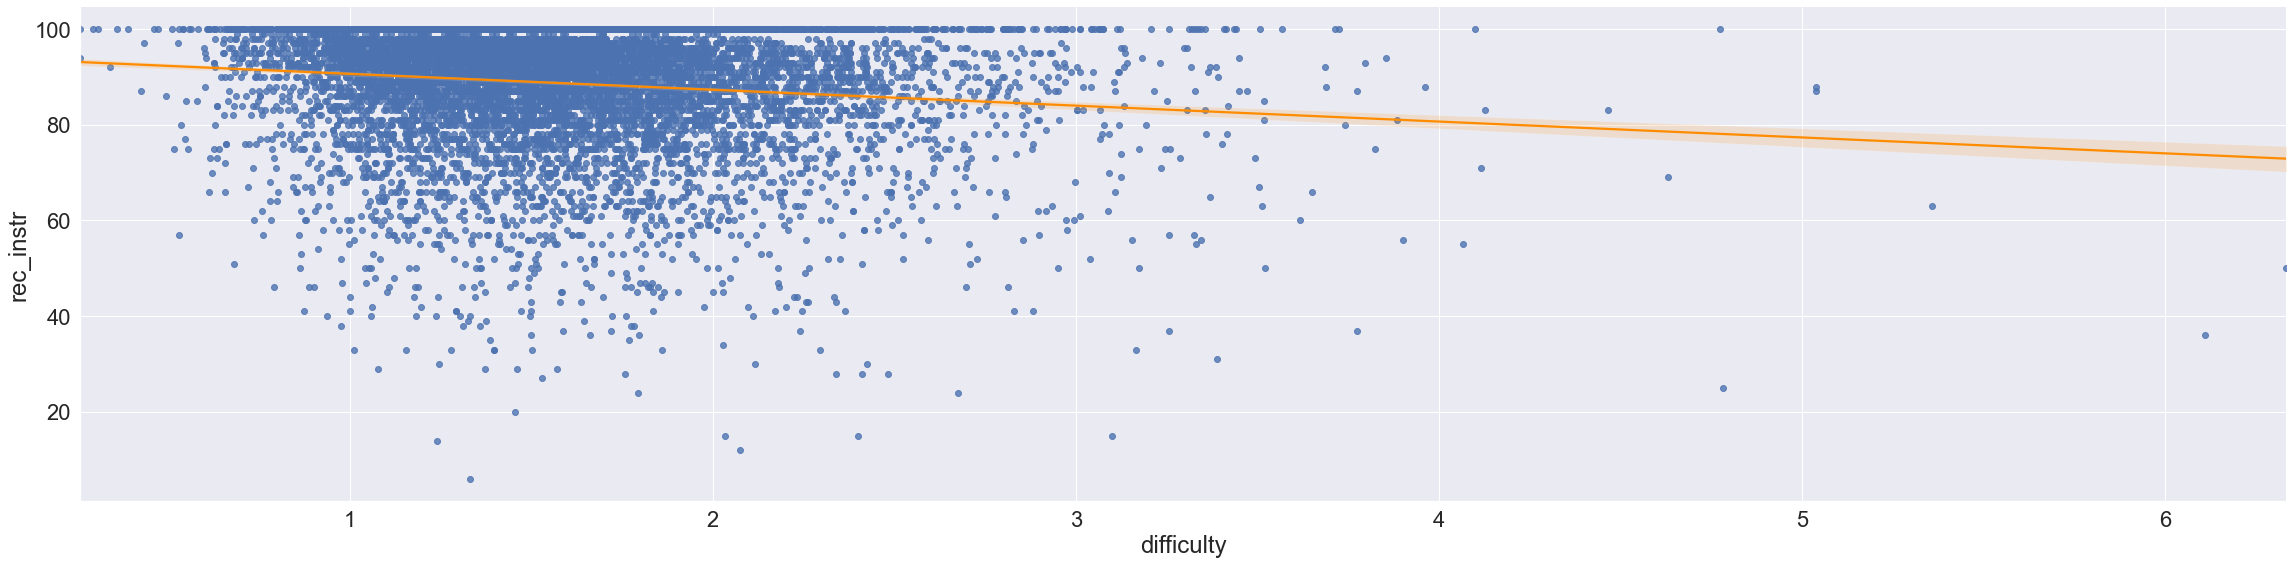

In [43]:
#find correlation between difficulty & rec_instr for social science
plot5 = sns.lmplot(x='difficulty', y='rec_instr', data=cape_social_sci, line_kws={'color': 'darkorange'},
                   fit_reg=True, height = 8, aspect = 4)

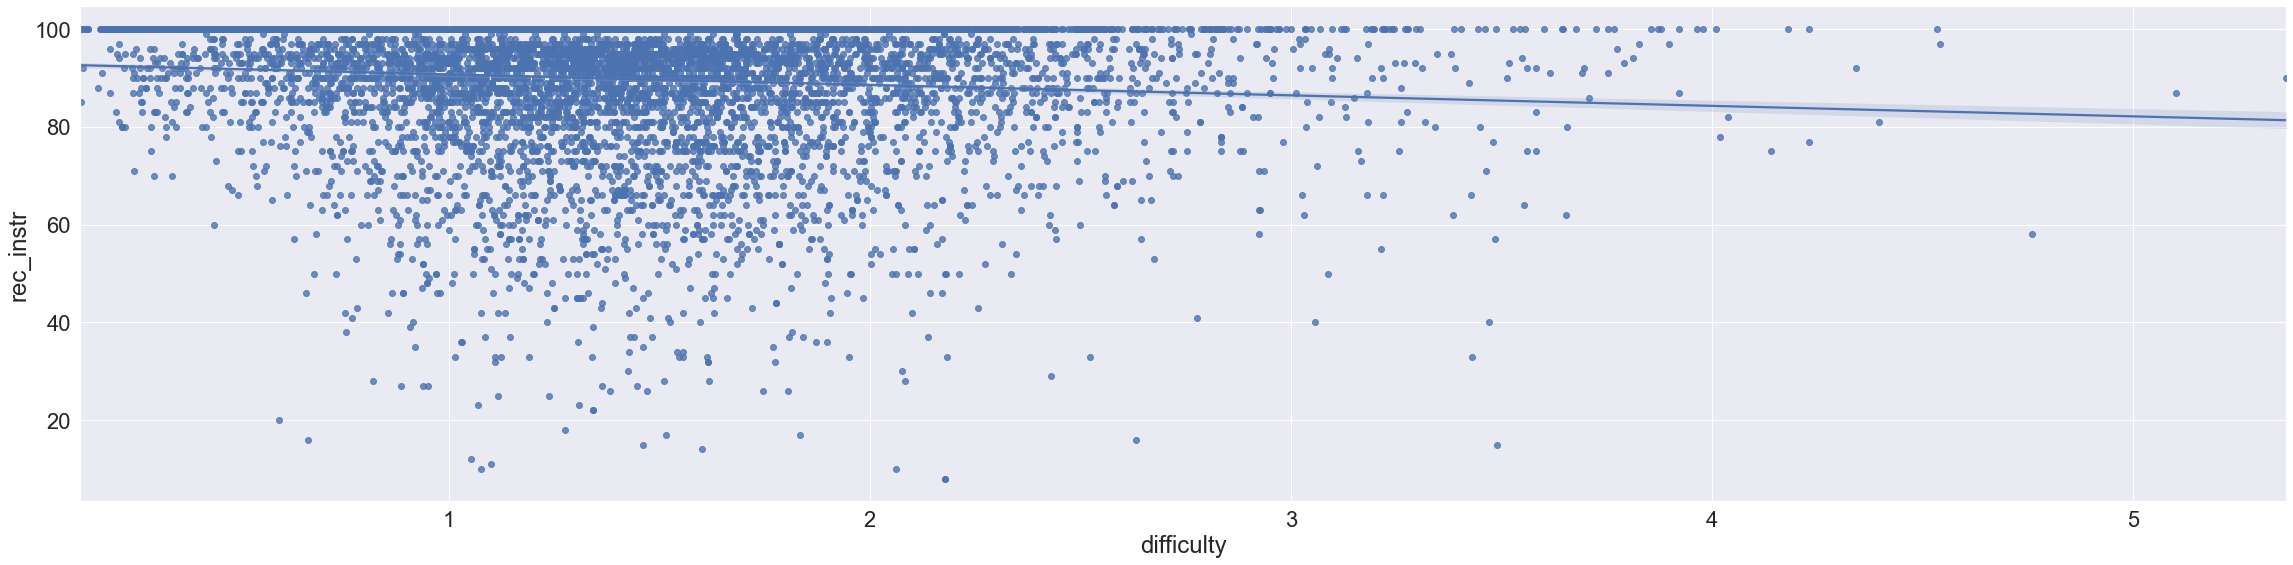

In [44]:
#find correlation between difficulty & rec_instr for humanities
plot6 = sns.lmplot(x='difficulty', y='rec_instr', data=cape_hum, fit_reg=True, height = 8, aspect = 4)

In the above graphs, the linear regression line all indicate a downward trend. However, similar to the `gpa_rec` and `rec_instr` graphs, the dots cluster around the top left corner, and __the regression line does not predict the location of observed the data__ in a useful manner.

This is confirmed by the linear regression analysis.

In [45]:
outcome4, predictor4 = patsy.dmatrices('rec_instr ~ difficulty', cape_stem)
model4 = sm.OLS(outcome4, predictor4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           3.11e-46
Time:                        23:56:04   Log-Likelihood:                -56175.
No. Observations:               13254   AIC:                         1.124e+05
Df Residuals:                   13252   BIC:                         1.124e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.1930      0.392    227.604      0.0

In [46]:
outcome5, predictor5 = patsy.dmatrices('rec_instr ~ difficulty', cape_social_sci)
model5 = sm.OLS(outcome5, predictor5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           4.00e-44
Time:                        23:56:04   Log-Likelihood:                -39930.
No. Observations:               10242   AIC:                         7.986e+04
Df Residuals:                   10240   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.9747      0.393    239.315      0.0

In [47]:
outcome6, predictor6 = patsy.dmatrices('rec_instr ~ difficulty', cape_hum)
model6 = sm.OLS(outcome6, predictor6)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     84.13
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           5.72e-20
Time:                        23:56:04   Log-Likelihood:                -33779.
No. Observations:                8436   AIC:                         6.756e+04
Df Residuals:                    8434   BIC:                         6.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.8897      0.361    257.222      0.0

Althought the coefficient seems to indicate that __difficulty negatively impacts rate of instructor recommendation__, the `R-squared` values and their corresponding __r-value are simply too small__ to suggest any correlation between the two values. Furthermore, the magnitude of the coeffecient in the social science dataset seems to be the highest of the three, which suggests that if the correlation between course difficulty and instructor recommendation exists, it has the largest impact over the field of social science, which is against what we hypothesized. This seems to suggest that we failed to reject the null hypothesis.

# Ethics & Privacy

We used data from CAPE in the public domain. The data is web-scraped by the Seascape team (David Cao and Tung Doan) and put onto a public GitHub repository under a MIT license. Therefore, we believe we have the permission to utilize the data.

In regards to privacy concerns towards the teachers that are evaluated in our data, we took steps to ensure that their names and the courses they teach remained anonymous. We assigned them each an identification code.

To ensure we don’t have a bias issue within our data we have taken into account the global pandemic, and acknowledge that teaching styles have changed dramatically as the majority of classes are currently taken online. Therefore, we decided to only examine data that was available before the pandemic (anything in and before Fall 2019).

We have also considered that a review by a student could be dependent on their personal issues and not primarily due to the teacher conducting the course or even the course difficulty.

We understand all these factors can cause bias in our analysis. We have used a wide range of data, and have tried to ensure we have minimal bias and privacy issues. We believe the algorithms used for analysis to be as transparent as we could acquire. Lastly, we don’t anticipate our findings to lead to any negative outcomes.

# Conclusion & Discussion

From the last several linear regression summaries, we can see that __our defined `difficulty` (`hours` / `gpa_rec`) variable seems to have a overall negative impact over the instructor ratings__. However, __the effect is quite small__, even when compared to the correlation between average GPA and instructor recommendations. Another surprising finding is that, based on the coeffecient of the linear regressions of the three field of study, __the impact of course difficulty over the instructor rating is actually the highest for social science courses__. This is again different from our hypothesis. Therefore, from our analysis, we believe that we have to __reject our hypothesis__ and accept that under our definition, __course diffculty does not have a significant correlation with instructor rating__, and that even if this correlation exits, __STEM courses do not exhibit the highest correlation__.

Of course, this finding may be due to the limitations of our analysis. Most significantly, __our definition of difficulty is based on the untested speculation the higher `hours` and lower `gpa_rec` means higher difficulty__. We try to formulate this definition by the data that we have, and there are certainly many other factors that impact the difficulty of a course.

Another limitation to our study is that the report from __students are subjective in nature__, so they may not reflect the actual hours spent studying the course, or the actual rating of the instructors. In particular, __a extremely high portion of the courses reports 100% recommendation for the instructor__, which heavily skews the `rec_instr` data. This increases the difficulty of fitting the data in a linear model.

Nevertheless, this is a surprising result for us. It seems to suggest that __unlike what we have guessed, students at UCSD are generally not biased by the difficulty of the course when trying to evaluate the teaching performance of their instructors__. Provided that this is true, it is certainly a good thing to see.

# Team Contributions

__Cheng (Tony) Chang__ helped establish research question and the (unfortunate) hypothesis. He conducted data cleaning, basic EDA, outlier rejections, and the final correlational analysis. He helped edit the brackground section and the descriptions of the graphs and regression summaries. He also wrote the overview and conclusions of the project.